# Mục Đích
> Trong bài trước chúng ta tập trung vào sentiment/phân loại nhóm cảm xúc cho words, sentences. Trong bài này chúng ta sẽ dự báo word(s) tiếp theo dựa vào chuỗi các từ đã có sẵn rồi.

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.preprocessing.text as text
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import json
%matplotlib inline

# Dữ Liệu
> Trong ví dụ đơn giản đầu tiên, chúng ta sẽ sử dụng phần tổng hợp của `Chúa tể những chiếc nhẫn - chương 1` trên [Wikipedia](https://en.wikipedia.org/wiki/The_Lord_of_the_Rings)

## Tokenization

>Như thường lệ, chúng ta cần tokenize dữ liệu trước.

In [ ]:
data = "Bilbo celebrates his 111th birthday and leaves the Shire suddenly without warning, leaving the Ring to Frodo Baggins, his cousin and heir.\nNeither hobbit is aware of the Ring's nature, but the wizard Gandalf realises that it is a Ring of Power.\nSeventeen years later, Gandalf tells Frodo that he has confirmed that the Ring is the one lost by the Dark Lord Sauron long ago and counsels him to take it away from the Shire.\nGandalf leaves, promising to return by Frodo's birthday and accompany him on his journey, but fails to do so.\nFrodo sets out on foot, ostensibly moving to his new home in Crickhollow, accompanied by his gardener Sam Gamgee and his cousin Pippin Took.\nThey are pursued by mysterious Black Riders, but meet a passing group of Elves led by Gildor Inglorion, their chants to Elbereth warding off the Riders.\nThe hobbits spend the night with them, then take a short cut to avoid their pursuers the next day, and arrive at the farm of Farmer Maggot.\nHe takes them to Bucklebury Ferry, where they meet their friend Merry Brandybuck who was looking for them.\nWhen they reach the house at Crickhollow, Merry and Pippin reveal they know about the Ring and insist on travelling with Frodo and Sam.\nThey decide to try to shake off the Black Riders by cutting through the Old Forest.\nMerry and Pippin are trapped by Old Man Willow, an evil tree who controls much of the forest, but are rescued by the mysterious Tom Bombadil.\nLeaving, they are caught by a barrow-wight, who takes them inside a barrow on the downs.\nFrodo, awakening from the barrow-wight's spell, manages to call Bombadil, who frees them, and equips them with ancient swords from the barrow-wight's hoard.\nThe hobbits reach the village of Bree, where they encounter a Ranger named Strider.\nThe innkeeper gives Frodo a letter from Gandalf written three months before which identifies Strider as a friend.\nStrider leads the hobbits into the wilderness after another close escape from the Black Riders, who they now know to be the Nazgûl, men of ancient times enslaved by lesser Rings of Power to serve Sauron.\nOn the hill of Weathertop, they are again attacked by the Nazgûl, who wound Frodo with a cursed blade. Strider fights them off and leads the hobbits towards the Elven refuge of Rivendell.\nFrodo falls deathly ill; Strider treats him with the herb athelas, saving his life.\nThe Nazgûl nearly capture Frodo at the Ford of Bruinen, but Strider, Sam and the Elf-lord Glorfindel drive the Nazgûl into the water, where flood waters summoned by Elrond, master of Rivendell, rise up and overwhelm them."

In [ ]:
print(data)

Bilbo celebrates his 111th birthday and leaves the Shire suddenly without warning, leaving the Ring to Frodo Baggins, his cousin and heir.
Neither hobbit is aware of the Ring's nature, but the wizard Gandalf realises that it is a Ring of Power.
Seventeen years later, Gandalf tells Frodo that he has confirmed that the Ring is the one lost by the Dark Lord Sauron long ago and counsels him to take it away from the Shire.
Gandalf leaves, promising to return by Frodo's birthday and accompany him on his journey, but fails to do so.
Frodo sets out on foot, ostensibly moving to his new home in Crickhollow, accompanied by his gardener Sam Gamgee and his cousin Pippin Took.
They are pursued by mysterious Black Riders, but meet a passing group of Elves led by Gildor Inglorion, their chants to Elbereth warding off the Riders.
The hobbits spend the night with them, then take a short cut to avoid their pursuers the next day, and arrive at the farm of Farmer Maggot.
He takes them to Bucklebury Ferry,

In [ ]:
corpus = data.lower().split('\n')
print(corpus)

['bilbo celebrates his 111th birthday and leaves the shire suddenly without warning, leaving the ring to frodo baggins, his cousin and heir.', "neither hobbit is aware of the ring's nature, but the wizard gandalf realises that it is a ring of power.", 'seventeen years later, gandalf tells frodo that he has confirmed that the ring is the one lost by the dark lord sauron long ago and counsels him to take it away from the shire.', "gandalf leaves, promising to return by frodo's birthday and accompany him on his journey, but fails to do so.", 'frodo sets out on foot, ostensibly moving to his new home in crickhollow, accompanied by his gardener sam gamgee and his cousin pippin took.', 'they are pursued by mysterious black riders, but meet a passing group of elves led by gildor inglorion, their chants to elbereth warding off the riders.', 'the hobbits spend the night with them, then take a short cut to avoid their pursuers the next day, and arrive at the farm of farmer maggot.', 'he takes th

In [ ]:
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'to': 3, 'of': 4, 'by': 5, 'frodo': 6, 'a': 7, 'they': 8, 'them': 9, 'his': 10, 'who': 11, 'strider': 12, 'but': 13, 'from': 14, 'on': 15, 'are': 16, 'with': 17, 'ring': 18, 'gandalf': 19, 'riders': 20, 'hobbits': 21, 'barrow': 22, 'nazgûl': 23, 'is': 24, 'that': 25, 'him': 26, 'sam': 27, 'pippin': 28, 'black': 29, 'their': 30, 'off': 31, 'at': 32, 'where': 33, 'merry': 34, 'birthday': 35, 'leaves': 36, 'shire': 37, 'leaving': 38, 'cousin': 39, 'it': 40, 'power': 41, 'he': 42, 'lord': 43, 'sauron': 44, 'take': 45, 'crickhollow': 46, 'mysterious': 47, 'meet': 48, 'takes': 49, 'friend': 50, 'reach': 51, 'know': 52, 'old': 53, 'forest': 54, 'bombadil': 55, "wight's": 56, 'ancient': 57, 'leads': 58, 'into': 59, 'rivendell': 60, 'bilbo': 61, 'celebrates': 62, '111th': 63, 'suddenly': 64, 'without': 65, 'warning': 66, 'baggins': 67, 'heir': 68, 'neither': 69, 'hobbit': 70, 'aware': 71, "ring's": 72, 'nature': 73, 'wizard': 74, 'realises': 75, 'seventeen': 76, 'years': 77

## Tạo dữ liệu đầu vào
> Với dữ liệu đầu vào cho model dự báo từ tiếp theo, chúng ta cần làm là tạo ra chuỗi các sequences chứa các từ.

In [ ]:
input_sequences = []
empty_dict = {}
max_len = 0
for line in corpus:
#     print(line)
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequences = token_list[:i + 1]
        input_sequences.append(n_gram_sequences)
        
        length = len(n_gram_sequences)
        if length not in empty_dict.keys():
            empty_dict.update({length: 1})
        else: 
            new_value = empty_dict[length] + 1
            empty_dict.update({length: new_value})
        # Find longest max_len_gram:
        if len(n_gram_sequences) > max_len: max_len = len(n_gram_sequences)


max length:  38


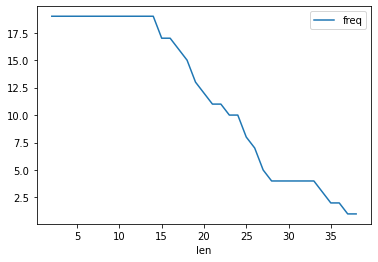

In [ ]:
import pandas as pd
print('max length: ', max_len)
pd.DataFrame(empty_dict.items(), columns=['len', 'freq']).plot(x='len', y='freq')
plt.show()

Chúng ta sẽ pad thêm 0 vào các sequence này, tuy nhiên, khác với các lần trước, lần này chúng ta sẽ pad vào trước để các ký tự cuối có ý nghĩa.

In [ ]:
# Pad sequences:
padded_sequences = np.array(pad_sequences(input_sequences, maxlen=max_len, padding='pre'))
padded_sequences

array([[  0,   0,   0, ...,   0,  61,  62],
       [  0,   0,   0, ...,  61,  62,  10],
       [  0,   0,   0, ...,  62,  10,  63],
       ...,
       [  0,   0,   1, ..., 231, 232,   2],
       [  0,   1,  23, ..., 232,   2, 233],
       [  1,  23, 218, ...,   2, 233,   9]], dtype=int32)

Từ dữ liệu đã được pad, chúng ta sẽ tạo ra dữ liệu Xs (biến ko phụ thuộc) và y (nhãn - biến phụ thuộc):
- Xs là toàn bộ sequences trừ số cuối cùng
- labels, y là số cuối cùng của từng sequences.

In [ ]:
# Tạo X và y cho dữ liệu đầu vào:
Xs, labels = padded_sequences[:, :-1], padded_sequences[:, -1]
ys = keras.utils.to_categorical(labels, num_classes=total_words) # biến đổi labels về dạng cateogry, trong đó số lượng cateogry = tổng số lượng từ.

In [ ]:
print(tokenizer.word_index['gandalf'])

19


# Tạo Model

In [ ]:
def plot_history(history):
    item_dict = {'Loss': ['loss', 'val_loss'], 'Accuracy': ['accuracy', 'val_accuracy']}
    plot_list = ['Loss', 'Accuracy']
    plt.figure(figsize=(8, 4))
    for i in range(len(plot_list)):
        plt.subplot(1, 2, i+1)
        item = plot_list[i]
        for items in item_dict[item]:
            plt.plot(history.history[items])
        plt.legend(item_dict[item])
    plt.tight_layout()

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(total_words, 64, input_length=max_len-1))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(20)))
model.add(keras.layers.Dense(total_words, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 37, 64)            14976     
_________________________________________________________________
bidirectional (Bidirectional (None, 40)                13600     
_________________________________________________________________
dense (Dense)                (None, 234)               9594      
Total params: 38,170
Trainable params: 38,170
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Xs.shape

(432, 37)

Epoch 1/50
10/10 [==============================] - 1s 76ms/step - loss: 4.7973 - accuracy: 0.0733 - val_loss: 6.1139 - val_accuracy: 0.0985
Epoch 2/50
10/10 [==============================] - 1s 74ms/step - loss: 4.7854 - accuracy: 0.0733 - val_loss: 6.1575 - val_accuracy: 0.0985
Epoch 3/50
10/10 [==============================] - 1s 74ms/step - loss: 4.7729 - accuracy: 0.0733 - val_loss: 6.2314 - val_accuracy: 0.0985
Epoch 4/50
10/10 [==============================] - 1s 74ms/step - loss: 4.7632 - accuracy: 0.0733 - val_loss: 6.2975 - val_accuracy: 0.0985
Epoch 5/50
10/10 [==============================] - 1s 73ms/step - loss: 4.7519 - accuracy: 0.0733 - val_loss: 6.3497 - val_accuracy: 0.0985
Epoch 6/50
10/10 [==============================] - 1s 73ms/step - loss: 4.7398 - accuracy: 0.0733 - val_loss: 6.3755 - val_accuracy: 0.0985
Epoch 7/50
10/10 [==============================] - 1s 75ms/step - loss: 4.7289 - accuracy: 0.0733 - val_loss: 6.5476 - val_accuracy: 0.0985
Epoch 8/50
10

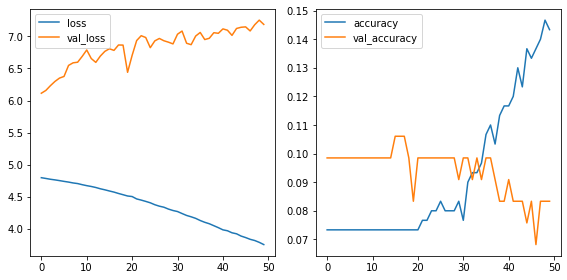

In [ ]:
model.fit(Xs[:300], ys[:300], epochs=50, validation_data=(Xs[300:], ys[300:]))
plot_history(model.history)

In [ ]:
seed_words = "In the heart of the journey"
next_words = 20

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_words])[0]
    token_list = pad_sequences([token_list], maxlen=max_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_words += " " + output_word
print(seed_words)

/home/ddpham/miniconda3/envs/tf/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In the heart of the journey by by the by by by the gildor inglorion their their the farm farm farm maggot maggot maggot maggot warding
